# Classification problem

## Import all library

In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler


import pickle
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


## Data Importing and Understanding

In [352]:
data = pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\Data\\spam.csv',encoding='latin-1')

In [353]:
# All columns of dataset
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [354]:
# All continuous columns of the dataset
data.columns[data.dtypes != object]

Index([], dtype='object')

In [355]:
# All categorical dataset

In [356]:
data.columns[data.dtypes == object]

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [357]:
print('Total rows of the dataset:-',data.shape[0])
print('Total columns of the dataset:-',data.shape[1])

Total rows of the dataset:- 5572
Total columns of the dataset:- 5


In [358]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data preprocessing

In [359]:
# Drop all Unnecessary columns
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [360]:
data.sample(5)

,v1,v2
1487,ham,I told your number to gautham..
3073,ham,Don know. I did't msg him recently.
725,ham,Got it! It looks scrumptious... daddy wants to...
2472,spam,Final Chance! Claim ur å£150 worth of discount...
3778,spam,"Claim a 200 shopping spree, just call 08717895..."


In [361]:
# Renamimg the columns 
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [362]:
data.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [363]:
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])

In [364]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [365]:
# Check missing value
data.isnull().sum()

target    0
text      0
dtype: int64

In [366]:
# Check Duplicates value
data.duplicated().sum()

403

In [367]:
# Drop all Duplicates value
data = data.drop_duplicates(keep='first')

In [368]:
data.duplicated().sum()

0

# Exploratory data Analysis

## check class inbalanced

In [369]:
# Check event rate / 
(data['target'].value_counts()/data.shape[0])*100

0    87.366996
1    12.633004
Name: target, dtype: float64

## Univariate Analysis

In [370]:
# Explore one column at one time
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

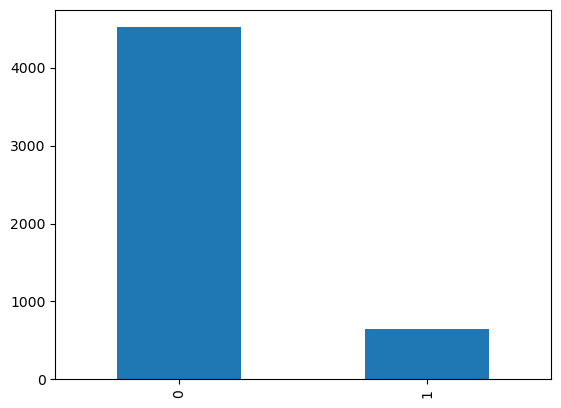

In [371]:
data['target'].value_counts().plot(kind='bar')
plt.show()

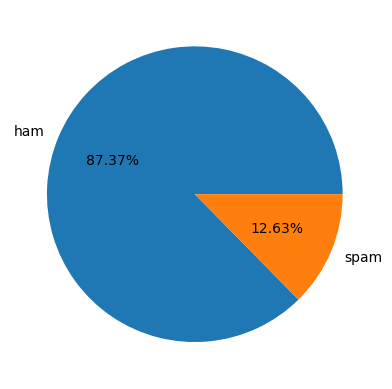

In [372]:
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%')
plt.show()

In [373]:
import nltk

In [374]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [375]:
# Add numbers of characters
data['num_char'] = data['text'].apply(len)

In [376]:
data.head(5)

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [377]:
# Add numbers of words
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [378]:
data.head(2)

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [379]:
# Add numbers of sentence
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [380]:
data.head(2)

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [381]:
# Perform statistical summary
data[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [382]:
# Basis of ham Perform statistical summary
data[data['target'] ==0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [383]:
# Basis of spam Perform statistical summary
data[data['target'] ==1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


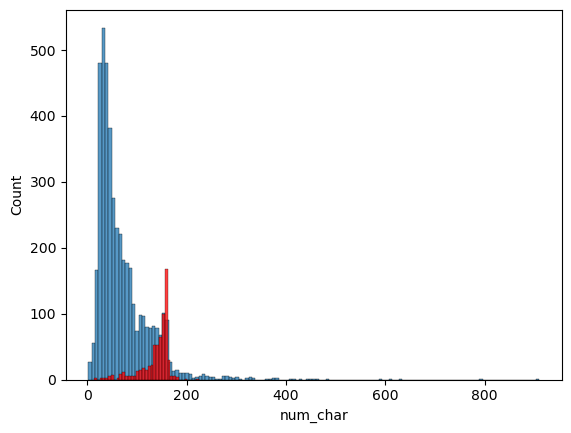

In [384]:
# ham messeges jyada character se bna hai 
# spam messeges kam character se bna hai
sns.histplot(data[data['target']==0]['num_char'])
sns.histplot(data[data['target']==1]['num_char'],color='red')
plt.show()

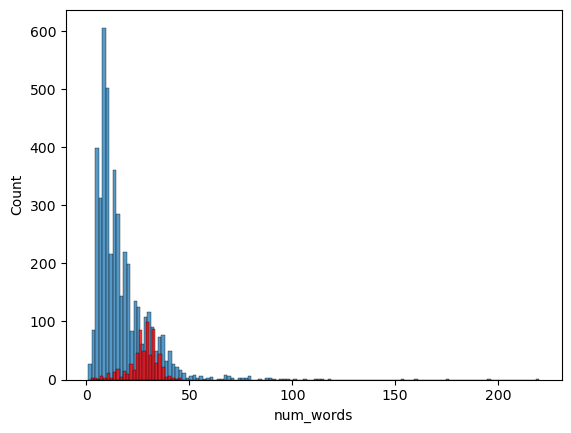

In [385]:
# ham messeges jyada words se bna hai 
# spam messeges kam words se bna hai
sns.histplot(data[data['target']==0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'],color='red')
plt.show()

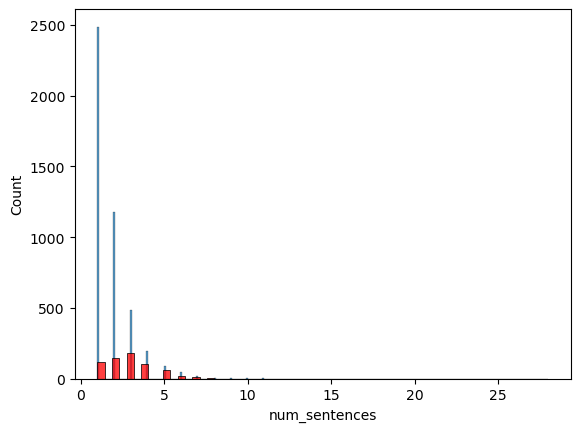

In [386]:
# ham messeges jyada sentences se bna hai 
# spam messeges kam sentences se bna hai
sns.histplot(data[data['target']==0]['num_sentences'])
sns.histplot(data[data['target']==1]['num_sentences'],color='red')
plt.show()

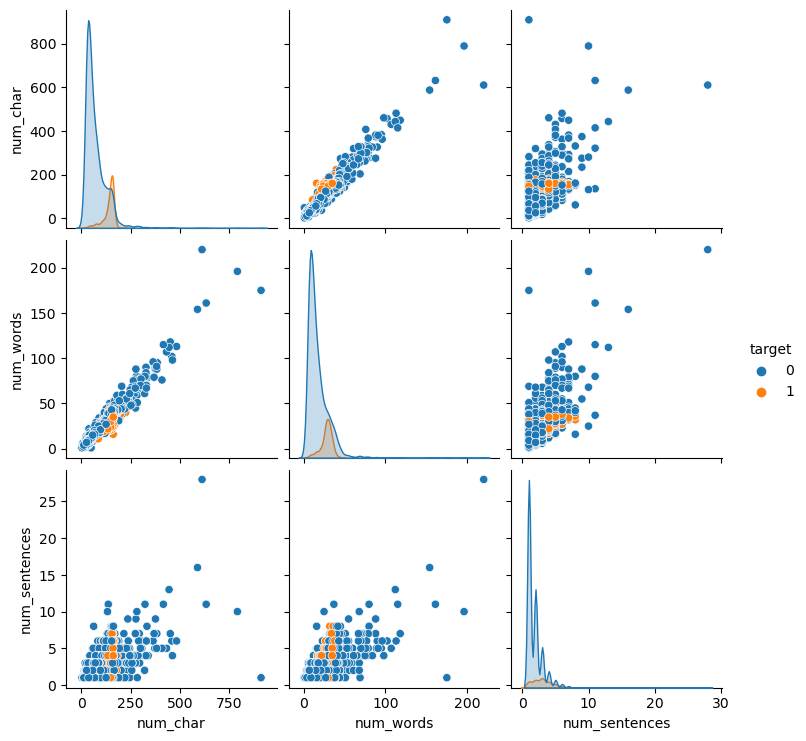

In [387]:
# find the relationship bitween each orthers
sns.pairplot(data,hue='target')
plt.show()

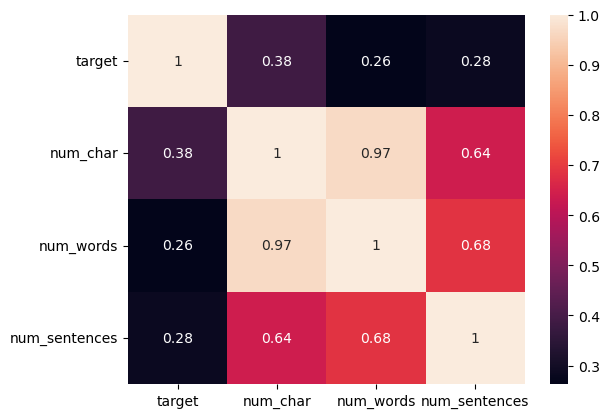

In [388]:
# find corrlation bitween each and others
sns.heatmap(data.corr(),annot=True)
plt.show()

# Data preprocessing
## Lower case
## Tokenization
## Removing speacial characters
## Removing stop words and punctuation
## Stemming

In [389]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [390]:
data['transformed_text'] = data['text'].apply(transform_text)

In [391]:
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [392]:
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

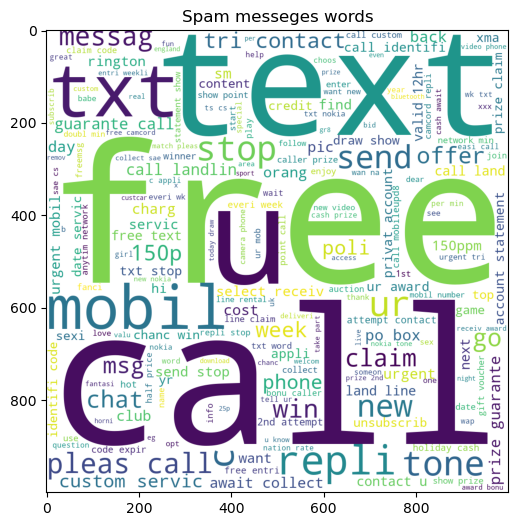

In [393]:
plt.figure(figsize=(20,6))
plt.title('Spam messeges words')
plt.imshow(spam_wc)
plt.show()

In [394]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))

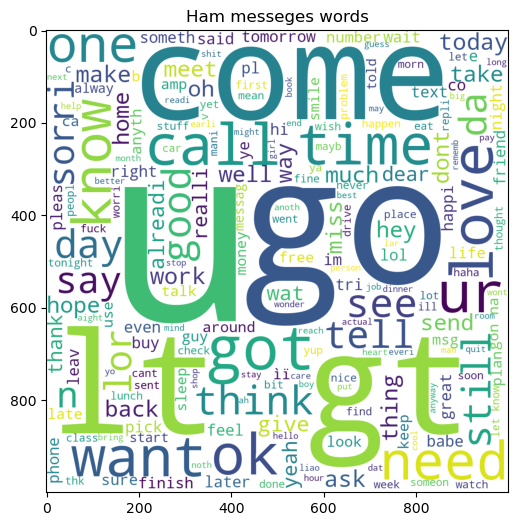

In [395]:
plt.figure(figsize=(15,6))
plt.title('Ham messeges words')
plt.imshow(ham_wc)
plt.show()


In [396]:
data.head(3)

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [397]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [398]:
len(spam_corpus)

9939

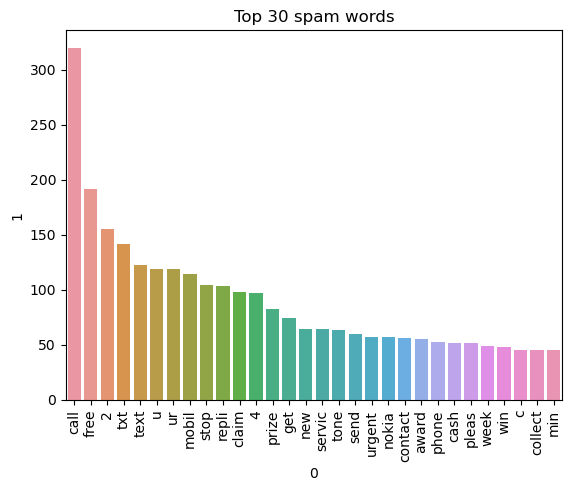

In [399]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.title('Top 30 spam words')
plt.xticks(rotation='vertical')
plt.show()

In [400]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

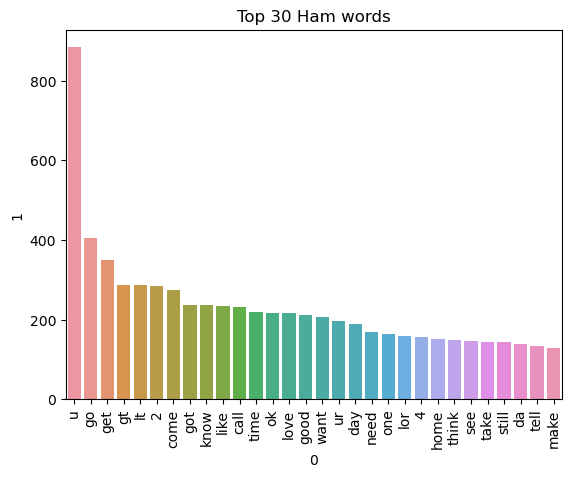

In [401]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.title('Top 30 Ham words')
plt.xticks(rotation='vertical')
plt.show()

# Text Vectorization

## Using Bag of words

In [402]:
cv = CountVectorizer()
X = cv.fit_transform(data['transformed_text']).toarray()
y = data['target'].values

In [403]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [404]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [405]:
# Data devide into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=123)

In [406]:
# handel class Inbalanced
RUS = RandomUnderSampler(sampling_strategy = 0.7, random_state = 123)
X_train, y_train = RUS.fit_resample(X_train,y_train)
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train)


In [407]:
y_train.value_counts()[1]/sum((y_train.value_counts()))*100

41.18602761982129

In [408]:
y_train.value_counts()[0]/sum(y_train.value_counts())*100

58.81397238017871

# Model Build and Evaluation

In [409]:
print('__________GaussianNB model____________')
def Model_Build_Eval(*args):
    gnb = GaussianNB()
    gnb.fit(X_train,y_train)
    y_pred = gnb.predict(X_test)
    print('Accuracy of GaussianNB model:-',accuracy_score(y_test,y_pred))
    print('_______Model Evaluation_______')
    
    con = pd.crosstab(y_test,y_pred)
    print(con)
    print(classification_report(y_test,y_pred))
    print('precision score of the model:-',precision_score(y_test,y_pred))
    
    print('__________MultinomialNB model____________')
    mnb = MultinomialNB()
    mnb.fit(X_train,y_train)
    y_pred2 = gnb.predict(X_test)
    print('Accuracy of MultinomialNB model:-',accuracy_score(y_test,y_pred2))
    print('_______Model Evaluation_______')
    
    con = pd.crosstab(y_test,y_pred2)
    print(con)
    print(classification_report(y_test,y_pred2))
    print('precision score of the model:-',precision_score(y_test,y_pred2))

    print('__________BernoulliNB model____________')
    bnb = BernoulliNB()
    bnb.fit(X_train,y_train)
    y_pred3 = bnb.predict(X_test)
    print('Accuracy of BernoulliNB model:-',accuracy_score(y_test,y_pred3))
    print('_______Model Evaluation_______')
    
    con = pd.crosstab(y_test,y_pred3)
    print(con)
    print(classification_report(y_test,y_pred3))
    print('precision score of the model:-',precision_score(y_test,y_pred3))
    

__________GaussianNB model____________


In [410]:
Model_Build_Eval(X_train,X_test,y_train,y_test)

Accuracy of GaussianNB model:- 0.9487427466150871
_______Model Evaluation_______
col_0    0    1
row_0          
0      848   40
1       13  133
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       888
           1       0.77      0.91      0.83       146

    accuracy                           0.95      1034
   macro avg       0.88      0.93      0.90      1034
weighted avg       0.95      0.95      0.95      1034

precision score of the model:- 0.7687861271676301
__________MultinomialNB model____________
Accuracy of MultinomialNB model:- 0.9487427466150871
_______Model Evaluation_______
col_0    0    1
row_0          
0      848   40
1       13  133
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       888
           1       0.77      0.91      0.83       146

    accuracy                           0.95      1034
   macro avg       0.88      0.93      0.90      1034
weighted avg    

In [411]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [412]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [413]:
def train_classifier(*args):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [414]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8868471953578336
Precision -  0.5633187772925764
For  KN
Accuracy -  0.9081237911025145
Precision -  1.0
For  NB
Accuracy -  0.9390715667311412
Precision -  0.7172774869109948
For  DT
Accuracy -  0.8887814313346228
Precision -  0.5778894472361809
For  LR
Accuracy -  0.9545454545454546
Precision -  0.8413793103448276
For  RF
Accuracy -  0.971953578336557
Precision -  0.9606299212598425
For  AdaBoost
Accuracy -  0.9448742746615088
Precision -  0.7763975155279503
For  BgC
Accuracy -  0.9400386847195358
Precision -  0.7413793103448276
For  ETC
Accuracy -  0.9671179883945842
Precision -  0.9
For  GBDT
Accuracy -  0.9168278529980658
Precision -  0.6785714285714286
For  xgb
Accuracy -  0.9458413926499033
Precision -  0.7848101265822784


In [415]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.908124,1.000000
5,RF,0.971954,0.960630
8,ETC,0.967118,0.900000
4,LR,0.954545,0.841379
10,xgb,0.945841,0.784810
6,AdaBoost,0.944874,0.776398
7,BgC,0.940039,0.741379
2,NB,0.939072,0.717277
9,GBDT,0.916828,0.678571
3,DT,0.888781,0.577889


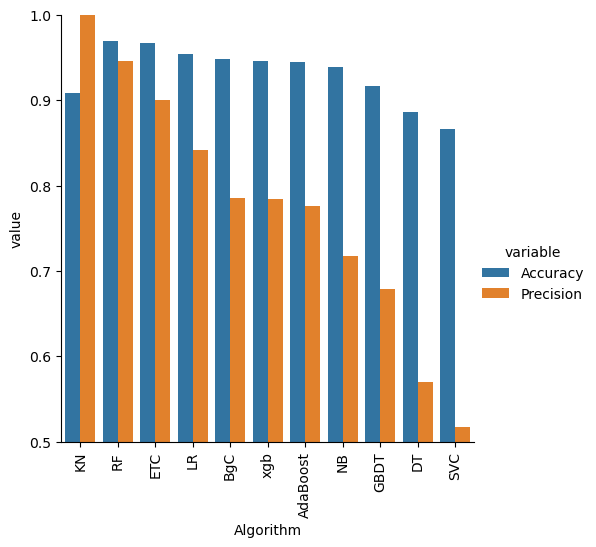

In [416]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Text vectorrization 2
## Using TF-IDF 

In [417]:
TF_IDF = TfidfVectorizer(max_features=3000)
X = TF_IDF.fit_transform(data['transformed_text']).toarray()
y = data['target'].values  
    
scaler = MinMaxScaler() 
X = scaler.fit_transform(X)
train_X,test_X,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [418]:
print('__________GaussianNB model____________')
def Model_Build_Eval(*args):
    gnb = GaussianNB()
    gnb.fit(X_train,y_train)
    y_pred = gnb.predict(X_test)
    print('Accuracy of GaussianNB model:-',accuracy_score(y_test,y_pred))
    print('_______Model Evaluation_______')
    
    con = pd.crosstab(y_test,y_pred)
    print(con)
    print(classification_report(y_test,y_pred))
    print('precision score of the model:-',precision_score(y_test,y_pred))
    
    print('__________MultinomialNB model____________')
    mnb = MultinomialNB()
    mnb.fit(X_train,y_train)
    y_pred2 = gnb.predict(X_test)
    print('Accuracy of MultinomialNB model:-',accuracy_score(y_test,y_pred2))
    print('_______Model Evaluation_______')
    
    con = pd.crosstab(y_test,y_pred2)
    print(con)
    print(classification_report(y_test,y_pred2))
    print('precision score of the model:-',precision_score(y_test,y_pred2))

    print('__________BernoulliNB model____________')
    bnb = BernoulliNB()
    bnb.fit(X_train,y_train)
    y_pred3 = bnb.predict(X_test)
    print('Accuracy of BernoulliNB model:-',accuracy_score(y_test,y_pred3))
    print('_______Model Evaluation_______')
    
    con = pd.crosstab(y_test,y_pred3)
    print(con)
    print(classification_report(y_test,y_pred3))
    print('precision score of the model:-',precision_score(y_test,y_pred3))
    

__________GaussianNB model____________


In [419]:
Model_Build_Eval(X_train,X_test,y_train,y_test)

ValueError: Found input variables with inconsistent numbers of samples: [1231, 4135]

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(*args):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Exporting the Model

In [ ]:
RF

In [ ]:
# Export
pickle.dump(RF,open('C:\\Users\\DELL\\OneDrive\\Desktop\\My project\\RF.pkl','wb'))

In [ ]:
data = pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\Data\\spam.csv',encoding='latin-1')

In [ ]:
data.head(3)

In [ ]:
data.columns

In [ ]:
# Import the Model
RF = pickle.load(open('C:\\Users\\DELL\\OneDrive\\Desktop\\My project\\RF.pkl','wb'))

In [ ]:
pickle.dump(pipe,open('C:\\Users\\DELL\\OneDrive\\Desktop\\My project\\Titanic Project Using piplinepipe.pkl','wb'))

In [ ]:
# Import the pipeline
pipe = pickle.load(open('C:\\Users\\DELL\\OneDrive\\Desktop\\My project\\Titanic Project Using piplinepipe.pkl','rb'))